# Final Project
## Jasmine Dumas (1523905)
## CSC 478: Programming Machine Learning Applications - Autumn 2016
## Due: Tuesday, November 22, 2016

____

#### Final Project Objective: 
* Analyze Lending Club's issued loans: https://www.kaggle.com/wendykan/lending-club-loan-data

#### Data Analysis Tasks:

1. Supervised Learning: Classifier using k Nearest Neighbor of payment status (Current, Late, Fully Paid, etc.)
  1. Exploratory Data Analysis
  2. Pre-processing & Data Cleaning
  3. Building the Classifier
  4. Evaluating the model



## 1. Load Libraries

In [48]:
## load libraries
import sys
from numpy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 2. Load the data

In [49]:
data = pd.read_csv("loan.csv", low_memory=False)

### a. Data reduction for computation
* From previous attempts to create a model matrix below and having the kernal crash, I'm going to reduce the data set size to compute better by selecting a random sample of 20% from the original dataset

In [50]:
# 5% of the data without replacement
data = data.sample(frac=0.05, replace=False, random_state=123)  

## 3. Explore the data
* visaully and descriptive methods

In [51]:
data.shape

(44369, 74)

In [52]:
data.head(n=5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
70467,8556040,10308118,13000.0,13000.0,12950.0,36 months,9.67,417.47,B,B1,...,NaN,NaN,NaN,NaN,NaN,NaN,19200.0,NaN,NaN,NaN
165635,3355435,4168922,8000.0,8000.0,8000.0,36 months,13.11,269.98,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,12400.0,NaN,NaN,NaN
496523,66611115,71336859,10000.0,10000.0,10000.0,36 months,10.64,325.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,18200.0,NaN,NaN,NaN
182496,1685370,1967570,16000.0,16000.0,16000.0,36 months,15.80,560.94,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,24000.0,NaN,NaN,NaN
554977,63286796,67528574,10000.0,10000.0,10000.0,36 months,7.89,312.86,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,13000.0,NaN,NaN,NaN


In [53]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

The **loan_status** column is the target!

### a. How many classes are there?

In [54]:
pd.unique(data['loan_status'].values.ravel())

array(['Current', 'Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Issued', 'Default', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

In [55]:
print("Amount of Classes: ", len(pd.unique(data['loan_status'].values.ravel())))

Amount of Classes:  10


In [56]:
len(pd.unique(data['zip_code'].values.ravel())) # want to make sure this was not too unique

860

In [57]:
len(pd.unique(data['url'].values.ravel())) # drop url

44369

In [58]:
len(pd.unique(data['last_pymnt_d'].values.ravel()))

94

In [59]:
len(pd.unique(data['next_pymnt_d'].values.ravel()))

64

In [60]:
for col in data.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(data[col].unique())) )

Column term has 2 unique instances
Column grade has 7 unique instances
Column sub_grade has 35 unique instances
Column emp_title has 23766 unique instances
Column emp_length has 12 unique instances
Column home_ownership has 5 unique instances
Column verification_status has 3 unique instances
Column issue_d has 102 unique instances
Column loan_status has 10 unique instances
Column pymnt_plan has 1 unique instances
Column url has 44369 unique instances
Column desc has 6294 unique instances
Column purpose has 14 unique instances
Column title has 4681 unique instances
Column zip_code has 860 unique instances
Column addr_state has 50 unique instances
Column earliest_cr_line has 591 unique instances
Column initial_list_status has 2 unique instances
Column last_pymnt_d has 94 unique instances
Column next_pymnt_d has 64 unique instances
Column last_credit_pull_d has 87 unique instances
Column application_type has 2 unique instances
Column verification_status_joint has 4 unique instances


### b. Are there unique customers in the data or repeats? 

In [62]:
len(pd.unique(data['member_id'].values.ravel())) == data.shape[0]

True

### c. Drop some of the junk variables (id, member_id, ...)
* Reasons: High Cardinality
* pre-pre-processing 😃

In [63]:
data = data.drop('id', 1) #
data = data.drop('member_id', 1)#
data = data.drop('url', 1)#
data = data.drop('purpose', 1)
data = data.drop('title', 1)#
data = data.drop('zip_code', 1)#
data = data.drop('emp_title', 1)#
data = data.drop('earliest_cr_line', 1)#
data = data.drop('term', 1)
data = data.drop('sub_grade', 1) #
data = data.drop('last_pymnt_d', 1)#
data = data.drop('next_pymnt_d', 1)#
data = data.drop('last_credit_pull_d', 1)
data = data.drop('issue_d', 1) ##
data = data.drop('desc', 1)##
data = data.drop('addr_state', 1)##

In [65]:
data.shape

(44369, 58)

In [66]:
# yay this is better
for col in data.select_dtypes(include=['object']).columns:
    print ("Column {} has {} unique instances".format( col, len(data[col].unique())) )

Column grade has 7 unique instances
Column emp_length has 12 unique instances
Column home_ownership has 5 unique instances
Column verification_status has 3 unique instances
Column loan_status has 10 unique instances
Column pymnt_plan has 1 unique instances
Column initial_list_status has 2 unique instances
Column application_type has 2 unique instances
Column verification_status_joint has 4 unique instances


### d. Exploratory Data Analysis: What is the distribution of the loan amount?
* In general the loans amount was usually under $15,000

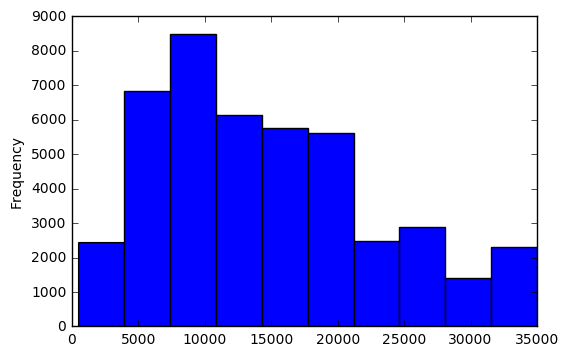

In [70]:
data['loan_amnt'].plot(kind="hist", bins=10)

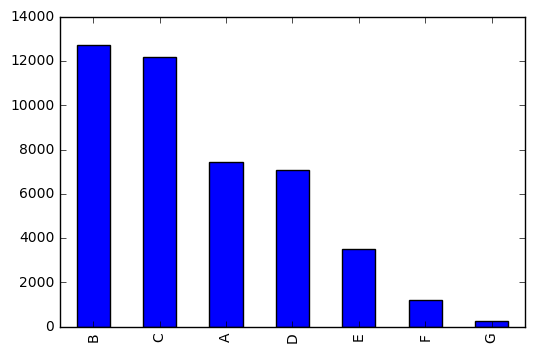

In [71]:
data['grade'].value_counts().plot(kind='bar')

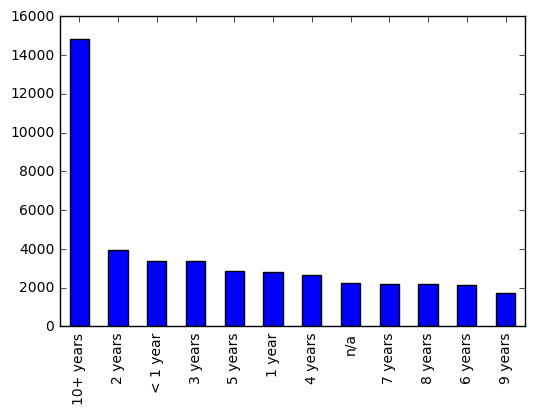

In [72]:
data['emp_length'].value_counts().plot(kind='bar')

### e. What is the distribution of target class?
* Most of this dataset the loans are in a current state (in-payment?), or Fully paid off
* Looks like a [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution)?!

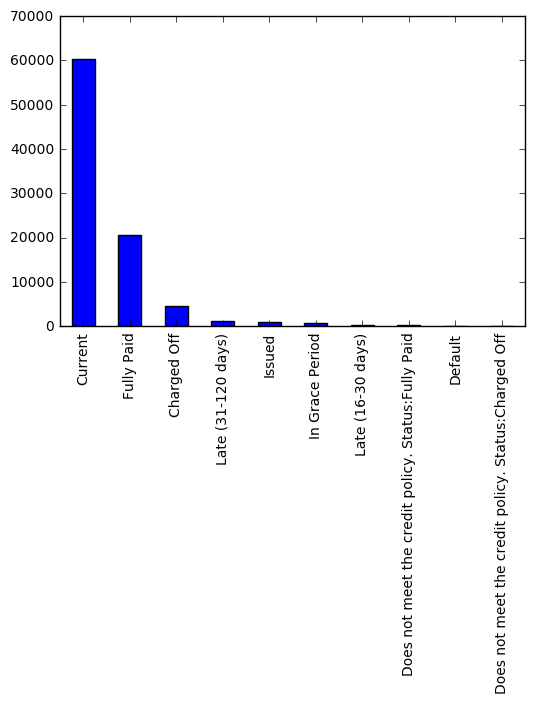

In [16]:
data['loan_status'].value_counts().plot(kind='bar')

### f. What are the numeric columns?
* For pre-processing and scaling

In [76]:
data._get_numeric_data().columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [77]:
"There are {} numeric columns in the data set".format(len(data._get_numeric_data().columns) )   

'There are 49 numeric columns in the data set'

### g. What are the character columns?
* For one-hot encoding into a model matrix

In [78]:
data.select_dtypes(include=['object']).columns

Index(['grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'pymnt_plan', 'initial_list_status', 'application_type',
       'verification_status_joint'],
      dtype='object')

In [79]:
"There are {} Character columns in the data set (minus the target)".format(len(data.select_dtypes(include=['object']).columns) -1) 

'There are 8 Character columns in the data set (minus the target)'

## 4. Pre-processing the data

### a. Remove the target from the entire dataset

In [80]:
X = data.drop("loan_status", axis=1, inplace = False)
y = data.loan_status

In [81]:
y.head()

70467        Current
165635    Fully Paid
496523       Current
182496    Fully Paid
554977       Current
Name: loan_status, dtype: object

### b. Transform the data into a model matrix with one-hot encoding
* isolate the variables of char class

In [83]:
def model_matrix(df , columns):
    dummified_cols = pd.get_dummies(df[columns])
    df = df.drop(columns, axis = 1, inplace=False)
    df_new = df.join(dummified_cols)
    return df_new

X = model_matrix(X, ['grade', 'emp_length', 'home_ownership', 'verification_status',
                    'pymnt_plan', 'initial_list_status', 'application_type', 'verification_status_joint'])

# 'issue_d' 'desc' 'addr_state'

In [84]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
70467,13000.0,13000.0,12950.0,9.67,417.47,96000.0,22.75,0.0,0.0,NaN,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
165635,8000.0,8000.0,8000.0,13.11,269.98,58000.0,17.46,1.0,0.0,18.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
496523,10000.0,10000.0,10000.0,10.64,325.69,52000.0,25.04,1.0,0.0,14.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
182496,16000.0,16000.0,16000.0,15.80,560.94,90000.0,18.16,0.0,3.0,34.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
554977,10000.0,10000.0,10000.0,7.89,312.86,75000.0,8.47,0.0,0.0,NaN,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [85]:
X.shape

(44369, 84)

### c. Scale the continuous variables use min max calculation

In [86]:
# impute rows with NaN with a 0 for now
X2 = X.fillna(value = 0)
X2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
70467,13000.0,13000.0,12950.0,9.67,417.47,96000.0,22.75,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
165635,8000.0,8000.0,8000.0,13.11,269.98,58000.0,17.46,1.0,0.0,18.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
496523,10000.0,10000.0,10000.0,10.64,325.69,52000.0,25.04,1.0,0.0,14.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
182496,16000.0,16000.0,16000.0,15.80,560.94,90000.0,18.16,0.0,3.0,34.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
554977,10000.0,10000.0,10000.0,7.89,312.86,75000.0,8.47,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [87]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()

X2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']] = Scaler.fit_transform(X2[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']])

In [88]:
X2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
70467,0.362319,0.362319,0.370000,0.183777,0.293954,0.015803,0.033828,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
165635,0.217391,0.217391,0.228571,0.329109,0.186030,0.009469,0.025962,0.058824,0.000000,0.141732,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
496523,0.275362,0.275362,0.285714,0.224757,0.226795,0.008468,0.037233,0.058824,0.000000,0.110236,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
182496,0.449275,0.449275,0.457143,0.442755,0.398936,0.014803,0.027003,0.000000,0.214286,0.267717,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
554977,0.275362,0.275362,0.285714,0.108576,0.217407,0.012302,0.012594,0.000000,0.000000,0.000000,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### d. Partition the data into train and testing 

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=.3, random_state=123)

In [90]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(31058, 84)
(31058,)
(13311, 84)
(13311,)


## 5. Building the k Nearest Neighbor Classifier
* experiment with different values for neighbors

In [91]:
# start out with the number of classes for neighbors
data_knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
data_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [92]:
data_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

### a. predict on the test data using the knn model created above

In [93]:
data_knn.predict(x_test)

array(['Current', 'Current', 'Current', ..., 'Current', 'Current',
       'Fully Paid'], dtype=object)

### b. Evaluating the classifier model using R squared

In [94]:
# R-square from training and test data
rsquared_train = data_knn.score(x_train, y_train)
rsquared_test = data_knn.score(x_test, y_test)
print ('Training data R-squared:')
print(rsquared_train)
print ('Test data R-squared:')
print(rsquared_test)

Training data R-squared:
0.829351535836
Test data R-squared:
0.804146946135


### c. Confusion Matrix

In [96]:
# confusion matrix
from sklearn.metrics import confusion_matrix

knn_confusion_matrix = confusion_matrix(y_true = y_test, y_pred = data_knn.predict(x_test))
print("The Confusion matrix:\n", knn_confusion_matrix)

The Confusion matrix:
 [[  79  480    0    0    0  104    0    0    0    0]
 [  14 8779    0    0    0  308    0    0    0    0]
 [   0   20    0    0    0    0    0    0    0    0]
 [   1    6    0    0    0    0    0    0    0    0]
 [   1   12    0    0    0   11    0    0    0    0]
 [  19 1204    0    0    0 1846    0    0    0    0]
 [   0   91    0    0    0    4    0    0    0    0]
 [   0  147    0    0    0    0    0    0    0    0]
 [   0   37    0    0    0    2    0    0    0    0]
 [   1  141    0    0    0    4    0    0    0    0]]


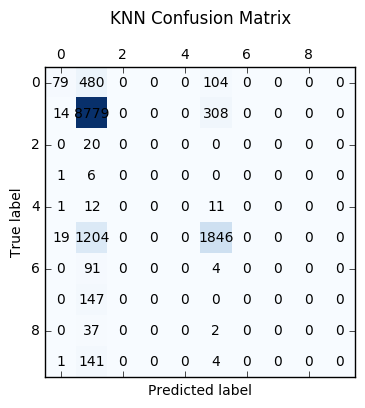

In [99]:
# visualize the confusion matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
plt.matshow(knn_confusion_matrix, cmap = plt.cm.Blues)
plt.title("KNN Confusion Matrix\n")
#plt.xticks([0,1], ['No', 'Yes'])
#plt.yticks([0,1], ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(knn_confusion_matrix.shape[0]):
    for x in range(knn_confusion_matrix.shape[1]):
        plt.text(x, y, '{}'.format(knn_confusion_matrix[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

### d. Classification Report

In [98]:
#Generate the classification report
from sklearn.metrics import classification_report
knn_classify_report = classification_report(y_true = y_test, 
                                           y_pred = data_knn.predict(x_test))
print(knn_classify_report)

             precision    recall  f1-score   support

Charged Off       0.69      0.12      0.20       663
    Current       0.80      0.96      0.88      9101
    Default       0.00      0.00      0.00        20
Does not meet the credit policy. Status:Charged Off       0.00      0.00      0.00         7
Does not meet the credit policy. Status:Fully Paid       0.00      0.00      0.00        24
 Fully Paid       0.81      0.60      0.69      3069
In Grace Period       0.00      0.00      0.00        95
     Issued       0.00      0.00      0.00       147
Late (16-30 days)       0.00      0.00      0.00        39
Late (31-120 days)       0.00      0.00      0.00       146

avg / total       0.77      0.80      0.77     13311



/Users/jasminedumas/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


___
fin.